<a href="https://colab.research.google.com/github/ZiyueNie/FM/blob/master/src/amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as so
import pandas as pd
import math
from scipy import stats

In [4]:
!git clone https://github.com/ZiyueNie/19ma573ZiyueNie

Cloning into '19ma573ZiyueNie'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 529 (delta 7), reused 0 (delta 0), pack-reused 499
Receiving objects: 100% (529/529), 814.27 KiB | 15.08 MiB/s, done.
Resolving deltas: 100% (207/207), done.


In [5]:
cd 19ma573ZiyueNie/src/


/content/19ma573ZiyueNie/src


In [6]:
'''======
Read data
========='''
#Read two-column data
#columns are date,adjusted closing price
Data_A = pd.read_csv('AMAZON year 1.csv')

print('>>>>>> data')
print(Data_A)

>>>>>> data
           Date    Adj Close
0      2017/9/8   965.900024
1     2017/9/11   977.960022
2     2017/9/12   982.580017
3     2017/9/13   999.599976
4     2017/9/14   992.210022
5     2017/9/15   986.789978
6     2017/9/18   974.190002
7     2017/9/19   969.859985
8     2017/9/20   973.210022
9     2017/9/21   964.650024
10    2017/9/22   955.099976
11    2017/9/25   939.789978
12    2017/9/26   938.599976
13    2017/9/27   950.869995
14    2017/9/28   956.400024
15    2017/9/29   961.349976
16    2017/10/2   959.190002
17    2017/10/3   957.099976
18    2017/10/4   965.450012
19    2017/10/5   980.849976
20    2017/10/6   989.580017
21    2017/10/9   990.989990
22   2017/10/10   987.200012
23   2017/10/11   995.000000
24   2017/10/12  1000.929993
25   2017/10/13  1002.940002
26   2017/10/16  1006.340027
27   2017/10/17  1009.130005
28   2017/10/18   997.000000
29   2017/10/19   986.609985
..          ...          ...
222   2018/7/27  1817.270020
223   2018/7/30  1779.219971
22

Problem3

In [7]:
log_return=[]
price = Data_A['Adj Close']
log_price=np.log(price)
for i in range(len(log_price)-1):
  log_return.append(log_price[i+1]-log_price[i])
print(log_return)


[0.012408457866161626, 0.004712990767658631, 0.017173392284830058, -0.007420374349124792, -0.00547757205843169, -0.012850870003573434, -0.004454642822253163, 0.003448193124559573, -0.008834542713898053, -0.009949344216038547, -0.016159599271635905, -0.0012670448504783494, 0.012987971940268572, 0.00579891094768481, 0.005162260975180466, -0.0022493412638615595, -0.002181326263480443, 0.008686472191874017, 0.015825191888836798, 0.00886110966029996, 0.001423805503678821, -0.0038317680640851393, 0.007870071851877825, 0.005942102647980008, 0.0020061278217955447, 0.0033843249284846166, 0.0027685648883783998, -0.012093087483393106, -0.010475960597156053, -0.0037572773383347524, -0.01704319943958854, 0.00988581415334, -0.003068594014668413, -0.0004934664563815971, 0.12413059165472795, 0.008952067494282012, -0.005026743662104316, -0.0014486230802548405, -0.00860834552180112, 0.01575864312394959, 0.008117430504196221, 0.0022372559059249397, 0.008607983640364303, -0.0033156382322596656, -0.0033533

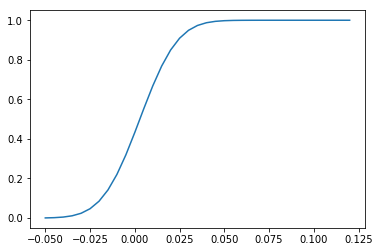

In [8]:

x = np.arange(-0.05, 0.125, 0.005)

y = stats.norm.cdf(x, 0.0028031285, 0.0166207965)

plt.plot(x, y)

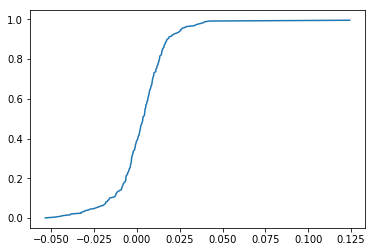

In [9]:
sorted_ = np.sort(log_return)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

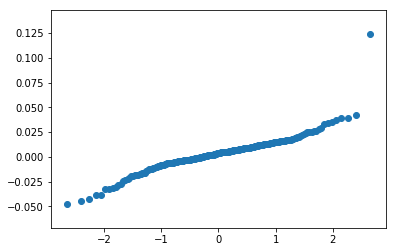

In [10]:
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)

QQ plot for normal distribution 


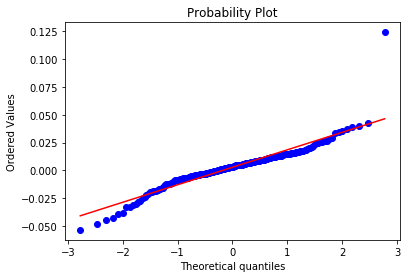

In [11]:
stats.probplot(log_return, dist="norm", plot=plt)
print('QQ plot for normal distribution ')
plt.show()

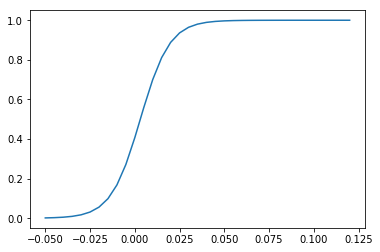

In [12]:
x = np.arange(-0.05, 0.125, 0.005)

y = stats.logistic.cdf(x, 0.0030732843, 0.0081693432)

plt.plot(x, y)

Problem4

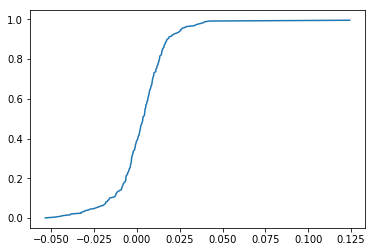

In [13]:
sorted_ = np.sort(log_return)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

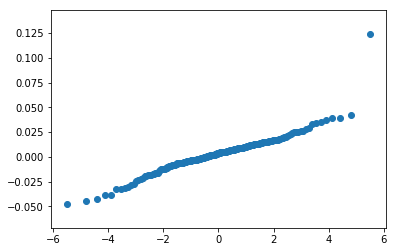

In [14]:
x_label = stats.logistic.ppf(yvals)
plt.scatter(x_label, sorted_)

QQ plot for logistic distribution


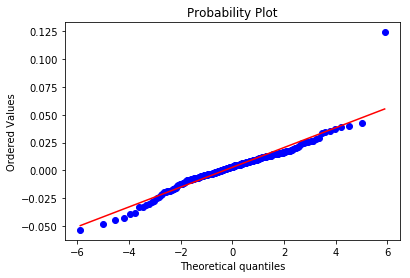

In [15]:
stats.probplot(log_return, dist="logistic", plot=plt)
print('QQ plot for logistic distribution')
plt.show()

problem7

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


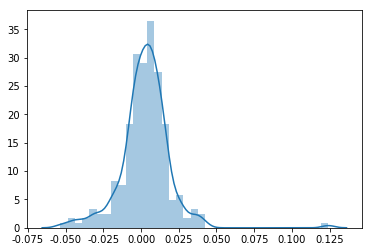

In [16]:
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
sns.distplot(log_return)
plt.show()

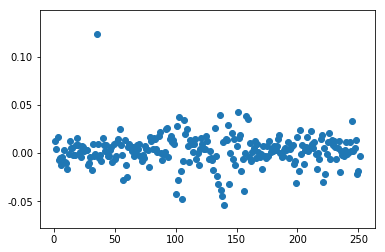

In [17]:
x=np.linspace(1,251,251)
y=log_return
plt.scatter(x,y)


In [18]:
out=log_return-np.mean(log_return)
sort_out=np.sort(out)
for i in [0,1,2,248,249,250]:
  print(sort_out[i])

-0.056268260646544735
-0.05071494583377696
-0.047632676993098325
0.036724551133014136
0.039527791322246306
0.1213274631077546


In [19]:
x1=0.1213274631077546+np.mean(log_return)
y1 = 1-stats.logistic.cdf(x1, 0.0030732843, 0.0081693432)
print(y1)
x2=np.mean(log_return)-0.056268260646544735
y2 = stats.logistic.cdf(x2, 0.0030732843, 0.0081693432)
print(y2)
x3=np.mean(log_return)-0.05071494583377696
y3 = stats.logistic.cdf(x3, 0.0030732843, 0.0081693432)
print(y3)

3.667859023170905e-07
0.0009860635724299688
0.0019440648901872242


Problem8

In [21]:
mean=np.mean(log_return)
print(mean)
std=np.std(log_return)
print(std)


0.002803128546973354
0.01662079654225133


In [22]:
from scipy.stats import kstest
sorted= np.sort(log_return)
kstest(sorted, 'norm',(0.002803128546973354, 0.01662079654225133))

KstestResult(statistic=0.0995187981015, pvalue=0.012884202437288305)

If we choose alpha=0.05,since p-value=0.013<0.05, then we reject that the data is normal distribution

In [23]:
from scipy.stats import kstest
sorted= np.sort(log_return)
kstest(sorted, 'logistic',(0.0030732843, 0.0081693432))

KstestResult(statistic=0.04892487163517811, pvalue=0.5823628886373462)

If we choose alpha=0.05,since p-value=0.58>0.05, then we cannot reject that the data is logistic distribution

problem 9

In [24]:
'''======
Read data
========='''
#Read two-column data
#columns are date,adjusted closing price
Data_B = pd.read_csv('Amazon Year 2.csv')

print('>>>>>> data')
print(Data_B)

>>>>>> data
           Date    Adj Close
0     2018/9/10  1939.010010
1     2018/9/11  1987.150024
2     2018/9/12  1990.000000
3     2018/9/13  1989.869995
4     2018/9/14  1970.189941
5     2018/9/17  1908.030029
6     2018/9/18  1941.050049
7     2018/9/19  1926.420044
8     2018/9/20  1944.300049
9     2018/9/21  1915.010010
10    2018/9/24  1934.359985
11    2018/9/25  1974.550049
12    2018/9/26  1974.849976
13    2018/9/27  2012.979980
14    2018/9/28  2003.000000
15    2018/10/1  2004.359985
16    2018/10/2  1971.310059
17    2018/10/3  1952.760010
18    2018/10/4  1909.420044
19    2018/10/5  1889.650024
20    2018/10/8  1864.420044
21    2018/10/9  1870.319946
22   2018/10/10  1755.250000
23   2018/10/11  1719.359985
24   2018/10/12  1788.609985
25   2018/10/15  1760.949951
26   2018/10/16  1819.959961
27   2018/10/17  1831.729980
28   2018/10/18  1770.719971
29   2018/10/19  1764.030029
..          ...          ...
220   2019/7/26  1943.050049
221   2019/7/29  1912.449951
22

In [25]:
log_return_2=[]
price_2 = Data_B['Adj Close']
log_price_2=np.log(price_2)
for i in range(len(log_price_2)-1):
  log_return_2.append(log_price_2[i+1]-log_price_2[i])
print(log_return_2)


[0.024523924785418316, 0.001433175248919838, -6.533127977004227e-05, -0.009939352603261398, -0.03205864348152154, 0.017157777644881023, -0.007565708038162811, 0.009238659342948097, -0.015179190548519905, 0.010053664890611103, 0.020564034442672074, 0.00015188484259809343, 0.01912376730413179, -0.004970144569326429, 0.0006787436403525859, -0.01662647402316697, -0.009454564701523616, -0.02244420753415266, -0.010407914626953563, -0.01344160306775688, 0.0031594739787328407, -0.06349821343399142, -0.020659177081078006, 0.0394866536587708, -0.01558536516636888, 0.03296109306961803, 0.0064463631629854135, -0.03387463740232999, -0.0037852464744823067, 0.014223528618352965, -0.011579723546041976, -0.06090028771403233, 0.06848724957559593, -0.08142352145214904, -0.0653533438077849, -0.005512646068656757, 0.0432168751169435, 0.04138429710550895, 0.0, -0.022913968497291215, 0.009178786151280427, 0.06633978836685106, -0.0003304216051223108, -0.024504146985264263, -0.04513979744459373, -0.00347607278

In [26]:

sorted_2= np.sort(log_return_2)
kstest(sorted_2, 'norm',(0.002803128546973354, 0.01662079654225133))

KstestResult(statistic=0.07998877218326361, pvalue=0.0782177581594927)

If we choose alpha=0.05,since p-value=0.078>0.05, then we cannot reject that the data is normal distribution

In [27]:

kstest(sorted_2, 'logistic',(0.0030732843, 0.0081693432))

KstestResult(statistic=0.09605565243808138, pvalue=0.01884922925186299)

If we choose alpha=0.05,since p-value=0.0188<0.05, then we reject that the data is logistic distribution

In [30]:
out_2=log_return_2-np.mean(log_return_2)
sort_out_2=np.sort(out_2)
for i in [0,1,2,246,247,248]:
  print(sort_out_2[i])

-0.08119884124859868
-0.06512866360423454
-0.06327353323044106
0.06656446857040142
0.0687119297791463
0.09047870412867075


In [31]:
x1=np.mean(log_return_2)+0.09047870412867075
y1 = 1-stats.norm.cdf(x1, 0.0028031285, 0.0166207965)
print(y1)
x2=np.mean(log_return_2)-0.08119884124859868
y2 = stats.norm.cdf(x2, 0.0028031285, 0.0166207965)
print(y2)
x3=np.mean(log_return_2)+0.0687119297791463
y3 = 1-stats.norm.cdf(x3, 0.0028031285, 0.0166207965)
print(y3)

7.14290094849801e-08
2.0148862450904269e-07
3.87627162448112e-05
